# Generate gamma

In [3]:
from matplotlib import pyplot as plt
import scipy.io.wavfile as wavfile
import seaborn as sns
import numpy as np
import sys
sns.set()
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.figsize'] = (10, 3)

### Twelve-tone equal temperament

f(i) = f_0 * 2^(i/12)<br/>
f(i) - the pitch, or frequency (usually in hertz), we need to find;<br/>
f_0 - the frequency of the reference pitch.

The reference pitch also known as Stuttgart pitch is A4, the 49th key from the left end of a piano, tuned to 440 Hz.<br/>

For the First octave we have the following notation of notes:<br/>
C4 -- 40th key <br/>
D4 -- 42th key <br/>
E4 -- 44th key <br/>
F4 -- 45th key <br/>
G4 -- 47th key <br/>
A4 -- 49th key <br/>
B4 -- 51th key .

In [4]:
intervals = {
    'unison' : 0,
    'minor_second' : 1,
    'major_second' : 2,
    'minor_third' : 3,
    'major_third' : 4,
    'perfect_fourth' :5,
    'tritone' : 6,
    'perfect_fifth' : 7,
    'minor_sixth' : 8,
    'major_sixth' : 9,
    'minor_seventh' : 10,
    'major_seventh' : 11,
    'octave' : 12
}

In [5]:
A4 = 440

In [6]:
octavas = {0 : 0.0625,
            1 : 0.125,
            2 : 0.25,
            3 : 0.5,
            4 : 1,
            5 : 2,
            6 : 4,
            7 : 8,
            8 : 16}

In [34]:

keys =  {
    'C' : -9,
    'D': -7,
    'E' : -5,
    'F' : -4,
    'G' : -2,
    'A' : 0,
    'B' : 2,
}

keys_serial =  {
    'C' : 0,
    'D' : 1,
    'E' : 2,
    'F' : 3,
    'G' : 4,
    'A' : 5,
    'B' : 6,
}

keys_sequence = ['C', 'D', 'E', 'F', 'G', 'A', 'B']
major = [2, 2, 1, 2, 2, 2, 1]
minor = [2, 1, 2, 2, 1, 2, 2]

In [35]:
gamma_C_major = {'C4' : 40,
                'D4' : 42,
                'E4' : 44,
                'F4' : 45,
                'G4' : 47,
                'A4' : 49,
                'B4' : 51,
                'C5' : 52}

In [60]:

tonality = {
        'major' : [0, 2, 4, 5, 7, 9, 11, 12],
        'minor' : [0, 2, 3, 5, 7, 8, 10, 12]
               }

def get_gamma(key='C', octava=4, ton='major'):
    freqs = dict()

    sequence = keys_sequence[keys_serial[key] :]
    if len(sequence) <= 8:
#         print(len(sequence))z
        sequence += keys_sequence[:abs(8 - len(sequence))]
    A_key = 12 * octava + 1
    first_key = A_key + keys[key]
    gamma = dict()
    next_octava = octava + 1
    for i in range(0, 8):
        note = sequence[i]
        A_key = 12 * octava + 1
        piano_key = first_key + tonality[ton][i]
        if 'B' + str(octava) in list(gamma.keys()):

            gamma[note + str(octava + 1)] = octavas[octava] * A4 *  (2 ** ((piano_key - A_key) / 12)) 
#             print([note + str(octava + 1)] , gamma[note + str(octava + 1)])
        else:
            gamma[note + str(octava)] = octavas[octava] * A4 *  (2 ** (( piano_key - A_key) / 12)) 
    return gamma

get_gamma(key='C', octava=4, ton='minor')

{'A4': 415.3046975799451,
 'B4': 466.1637615180899,
 'C4': 261.6255653005986,
 'C5': 523.2511306011972,
 'D4': 293.6647679174076,
 'E4': 311.1269837220809,
 'F4': 349.2282314330039,
 'G4': 391.99543598174927}

In [44]:
freqs = dict()
octava = 4
key = 'C'
tonality = {
    'major' : [2, 2, 1, 2, 2, 2, 1],
    'minor' : [2, 1, 2, 2, 1, 2, 2]
           }

sequence = keys_sequence[keys_serial[key] : keys_serial[key] + 7]

for k, v in keys.items():
    freqs[k + str(octava)] = octavas[octava] * A4 * (2 ** ((v) / 12))
freqs[k + str(octava + 1)] = octavas[octava + 1] * A4 * (2 ** ((v) / 12))
freqs

{'A4': 440.0,
 'B4': 493.8833012561241,
 'B5': 987.7666025122483,
 'C4': 261.6255653005986,
 'D4': 293.6647679174076,
 'E4': 329.6275569128699,
 'F4': 349.2282314330039,
 'G4': 391.99543598174927}

In [4]:
freq_1octave = dict()
for k, v in gamma_C_major.items():
    freq_1octave[k] = A4 * (2 ** ((v - gamma_C_major['A4']) / 12))
freq_1octave

{'A4': 440.0,
 'B4': 493.8833012561241,
 'C4': 261.6255653005986,
 'C5': 523.2511306011972,
 'D4': 293.6647679174076,
 'E4': 329.6275569128699,
 'F4': 349.2282314330039,
 'G4': 391.99543598174927}

In [26]:
freq_1octave['C4'] - freq_1octave['D4']

-32.03920261680895

In [15]:
sample_rate = 44100               # sample rate
sample_period = 1 / sample_rate   # sample period
t = 1                             # seconds of sampling
N = sample_rate * t               # total points in signal
t_vec = np.arange(N) * sample_period

## Sine Wave Sampling

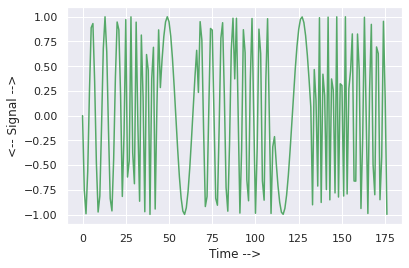

In [16]:
notes = [np.sin( 2 * np.pi * v * t_vec) for v in freq_1octave.values()]
gamma = np.concatenate(notes)

plt.plot(gamma[::2000], 'g')
plt.xlabel("Time -->")
plt.ylabel("<-- Signal -->")
plt.show()


In [7]:
normalized_gamma = np.int16((gamma / gamma.max()) * 32767)
wavfile.write('sine_waves_c_major.wav', sample_rate, normalized_gamma)
print("Generated notes were saved to file: sine_waves_c_major.wav")


Generated notes were saved to file: sine_waves_c_major.wav


## Inverse Fourier Transformation

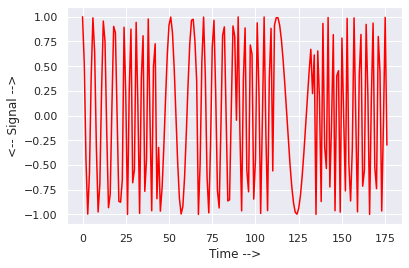

Generated notes were saved to file: fourier_trans.wav


In [18]:
notes = []
for v in freq_1octave.values():
    A = np.zeros(int(sample_rate / 2))
    A[int(v)] = sample_rate / 2
    note = np.fft.irfft(A)
    notes.append(np.tile(note, t))

gamma = np.concatenate(notes)

plt.plot(gamma[::2000], 'red')
plt.xlabel("Time -->")
plt.ylabel("<-- Signal -->")
plt.show()


wavfile.write('fourier_trans.wav', sample_rate, gamma)
print("Generated notes were saved to file: fourier_trans.wav")


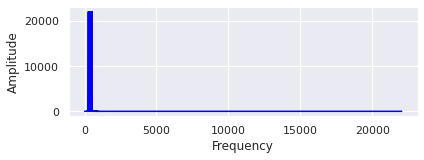

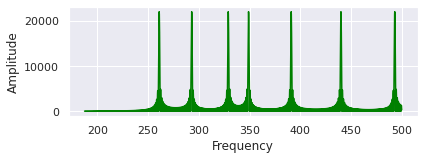

In [19]:
fft_spectrum = np.fft.rfft(gamma)
frequencies = np.fft.rfftfreq(gamma.size, d=sample_period)
fft_spectrum_abs = np.abs(fft_spectrum)
plt.subplot(2,1,1)
plt.plot(frequencies, fft_spectrum_abs, 'blue')
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()
plt.subplot(2,1,2)
plt.plot(frequencies[1500:4000], fft_spectrum_abs[1500:4000], 'green')
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

### Delete noises

In [12]:
for i,f in enumerate(fft_spectrum_abs):
    if f > 200: #looking at amplitudes of the spikes higher than 350 
        print('frequency = {} Hz with amplitude {} '.format(np.round(frequencies[i],1),  np.round(f)))

frequency = 237.6 Hz with amplitude 201.0 
frequency = 238.4 Hz with amplitude 209.0 
frequency = 238.5 Hz with amplitude 209.0 
frequency = 238.6 Hz with amplitude 212.0 
frequency = 239.4 Hz with amplitude 221.0 
frequency = 239.5 Hz with amplitude 221.0 
frequency = 239.6 Hz with amplitude 224.0 
frequency = 240.3 Hz with amplitude 202.0 
frequency = 240.4 Hz with amplitude 234.0 
frequency = 240.5 Hz with amplitude 235.0 
frequency = 240.6 Hz with amplitude 238.0 
frequency = 240.8 Hz with amplitude 207.0 
frequency = 241.3 Hz with amplitude 213.0 
frequency = 241.4 Hz with amplitude 249.0 
frequency = 241.5 Hz with amplitude 251.0 
frequency = 241.6 Hz with amplitude 253.0 
frequency = 241.8 Hz with amplitude 220.0 
frequency = 242.3 Hz with amplitude 226.0 
frequency = 242.4 Hz with amplitude 265.0 
frequency = 242.5 Hz with amplitude 268.0 
frequency = 242.6 Hz with amplitude 269.0 
frequency = 242.8 Hz with amplitude 233.0 
frequency = 243.3 Hz with amplitude 240.0 
frequency =

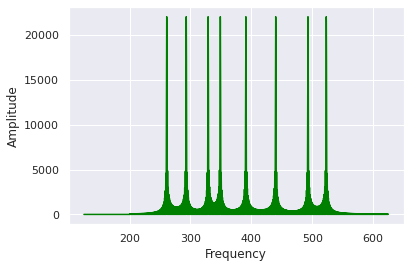

In [24]:
for i,f in enumerate(frequencies):
    if f < 200 or f > 20000:
        fft_spectrum[i] = 0.0
        
plt.plot(frequencies[1000:5000], np.abs(fft_spectrum[1000:5000]),'green')
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()


In [25]:
noiseless_signal = np.fft.irfft(fft_spectrum)
wavfile.write('c_major_noiseless.wav', sampFreq, noiseless_signal)
print("Generated notes were saved to file: c_major_noiseless.wav")

Generated notes were saved to file: c_major_noiseless.wav
